plots of SOG model run
- 1100 x 10 x 101 domain
- 1 day
- river on

In [1]:
import os
import re
import netCDF4 as nc

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
f=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runPISCESnopartial/SOG2D_1h_20041019_20041019_ptrc_T.nc')
f2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runPISCESnopartial/SOG2D_1h_20041019_20041019_grid_T.nc')
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
xx,zz=np.meshgrid(lons,-z[:])
e=int(len(t))#/4)
tt,tz=np.meshgrid(t[0:e],-z[:])
xt,yt=np.meshgrid(lons,lats)
f3=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runPISCESnopartial/mesh_mask.nc')

In [3]:
print(f3.variables)

OrderedDict([('nav_lon', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lon(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('nav_lat', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lat(y, x)
unlimited dimensions: 
current shape = (10, 1100)
filling off
), ('nav_lev', <class 'netCDF4._netCDF4.Variable'>
float32 nav_lev(z)
unlimited dimensions: 
current shape = (101,)
filling off
), ('time_counter', <class 'netCDF4._netCDF4.Variable'>
float64 time_counter(t)
unlimited dimensions: t
current shape = (1,)
filling off
), ('tmask', <class 'netCDF4._netCDF4.Variable'>
int8 tmask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 101, 10, 1100)
filling off
), ('umask', <class 'netCDF4._netCDF4.Variable'>
int8 umask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 101, 10, 1100)
filling off
), ('vmask', <class 'netCDF4._netCDF4.Variable'>
int8 vmask(t, z, y, x)
unlimited dimensions: t
current shape = (1, 101, 10, 1100)
filling off
), ('fmask', <class 'netCD

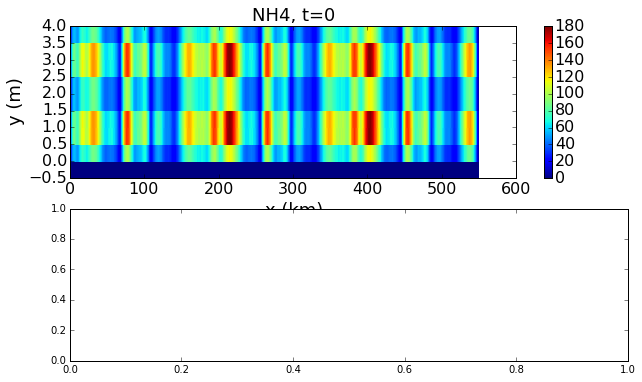

In [4]:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        mesh0=axs[0].pcolormesh(xt,yt,f.variables['NO3'][5,0,:,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('y (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

DIC
Alkalini
O2
CaCO3
PO4
POC
Si
PHY
ZOO
DOC
PHY2
ZOO2
DSi
Fer
BFe
GOC
SFe
DFe
GSi
NFe
NCHL
DCHL
NO3
NH4


/home/eolson/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


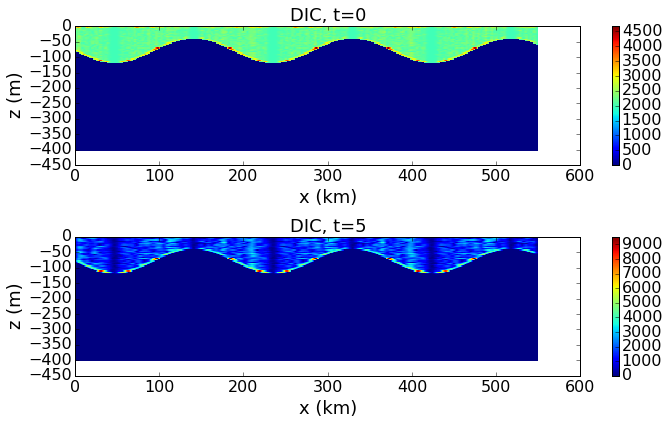

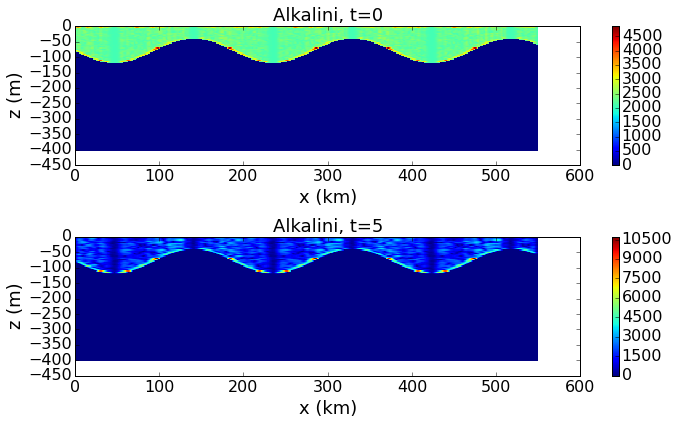

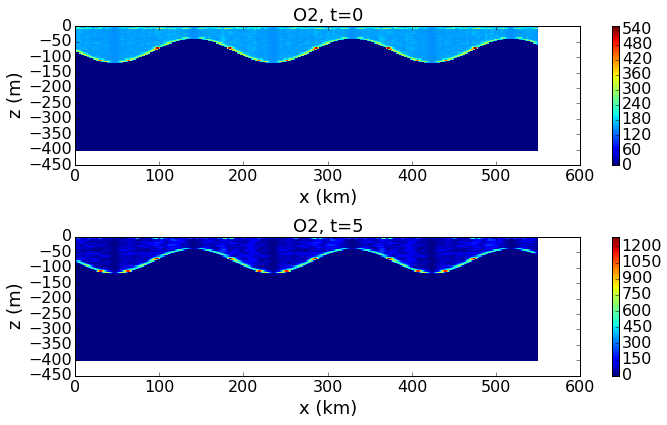

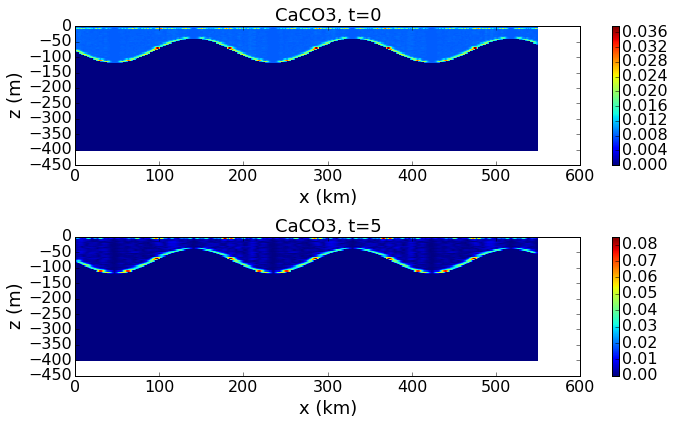

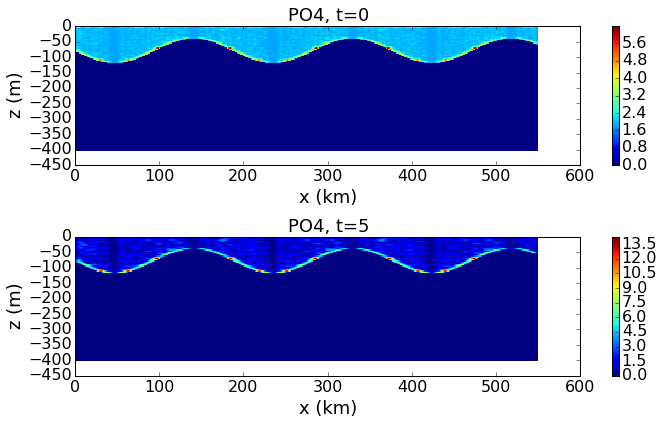

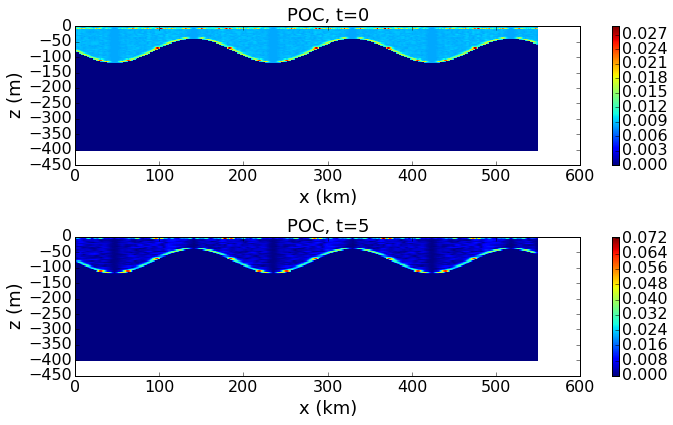

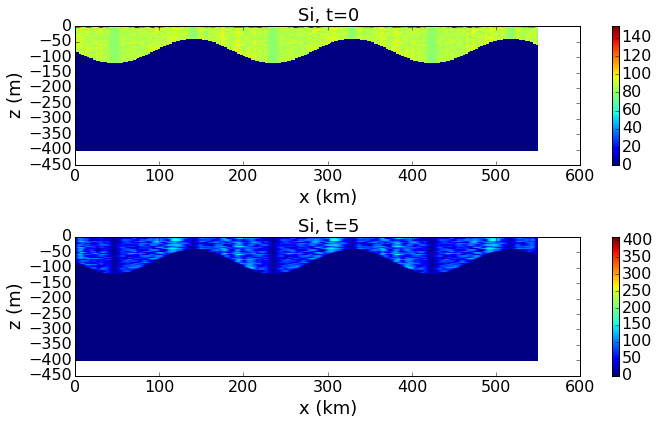

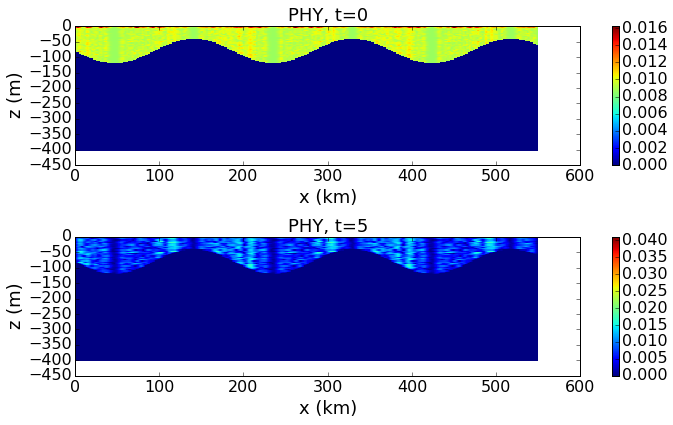

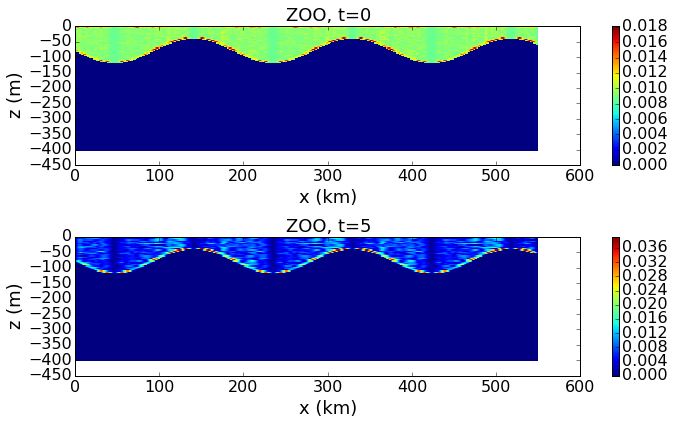

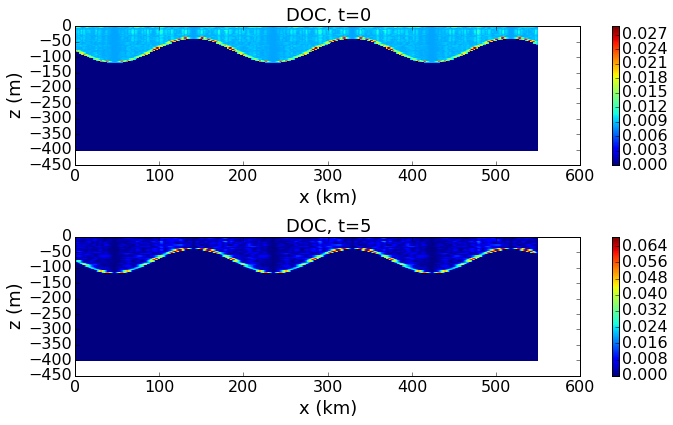

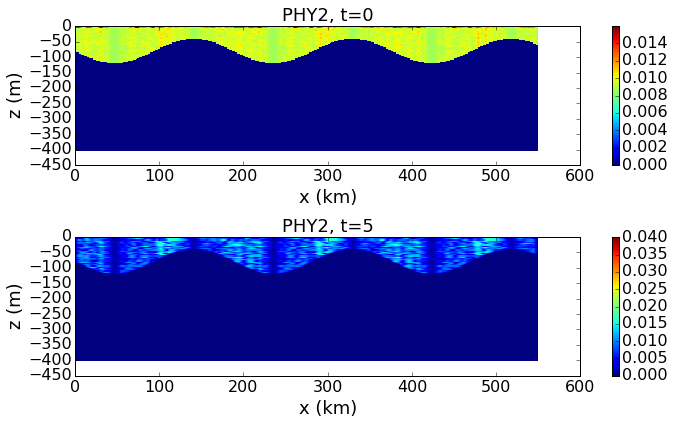

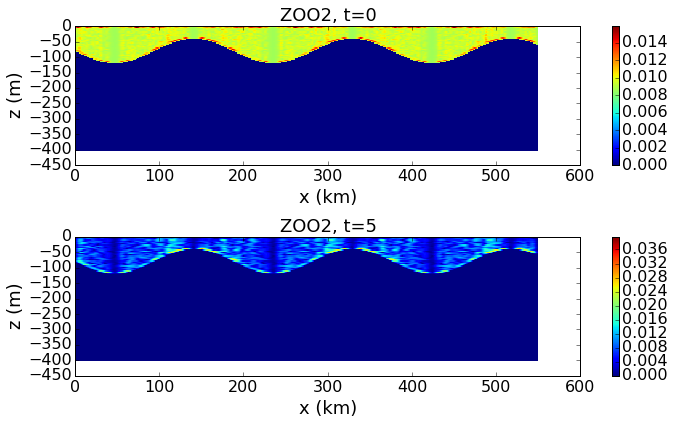

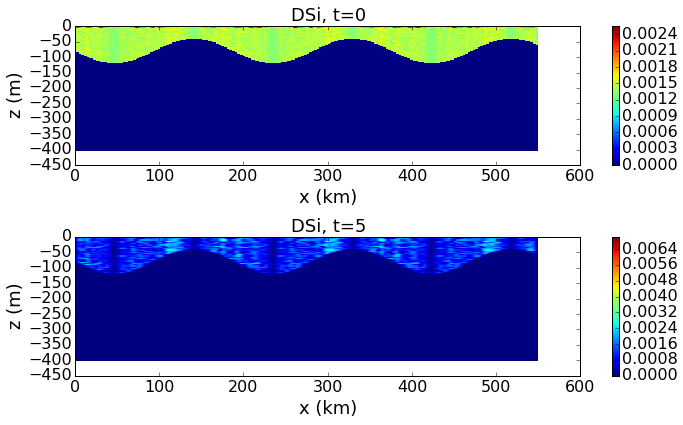

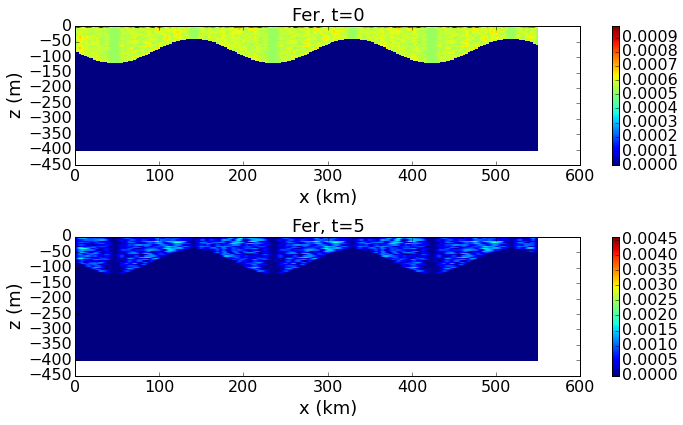

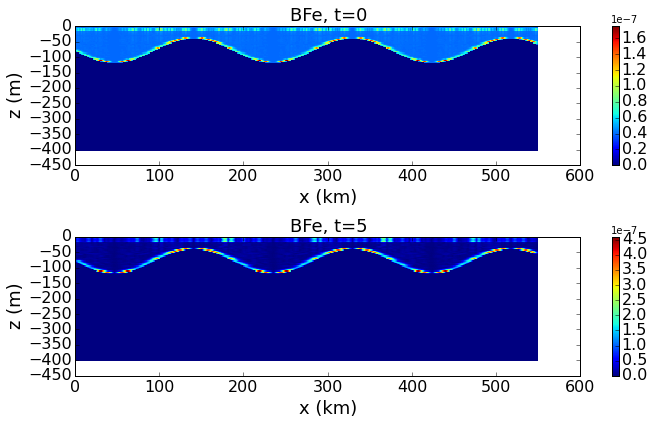

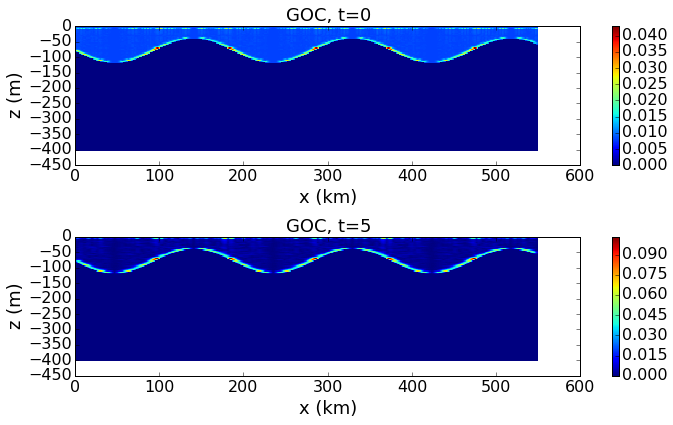

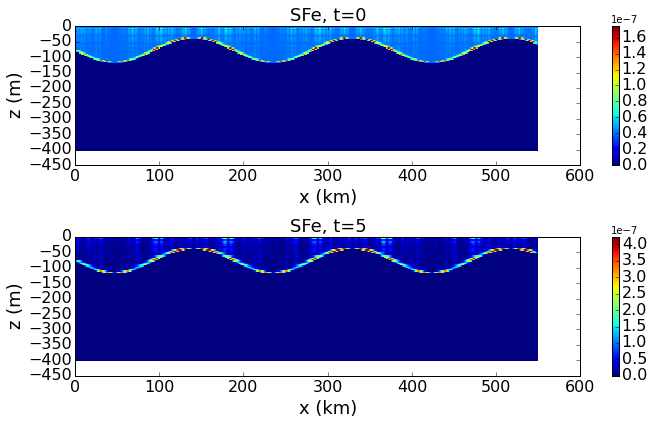

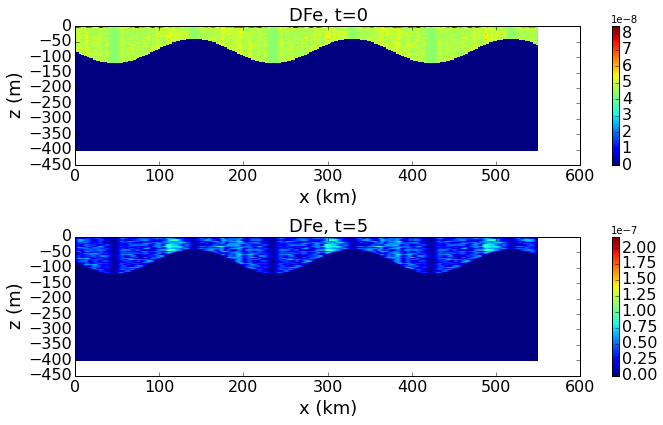

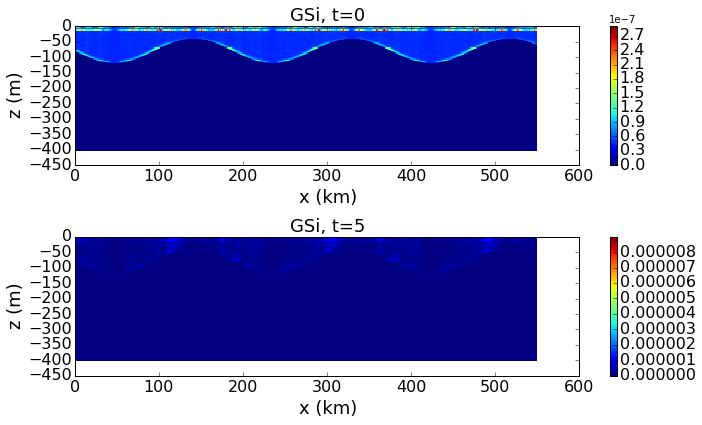

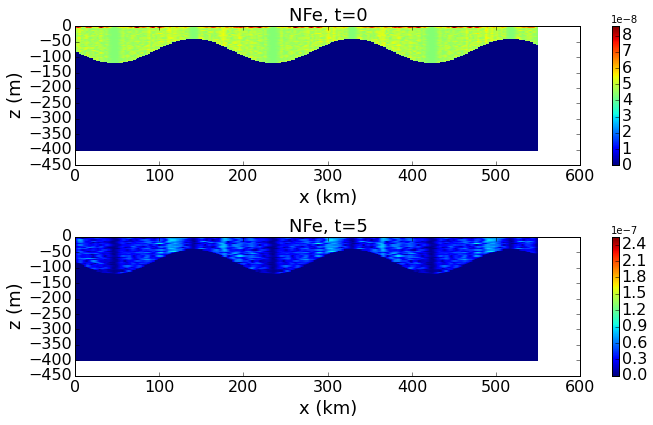

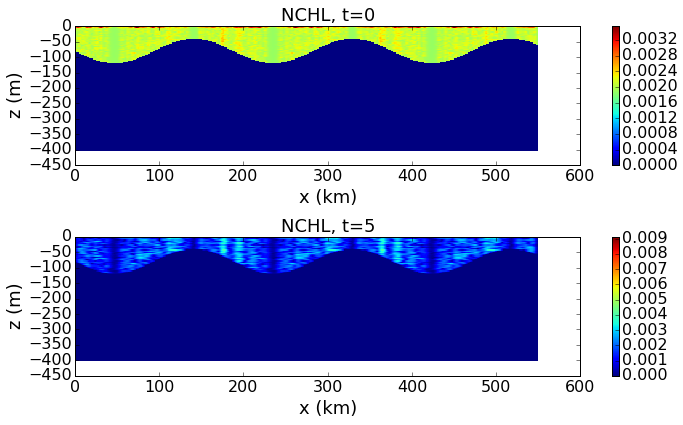

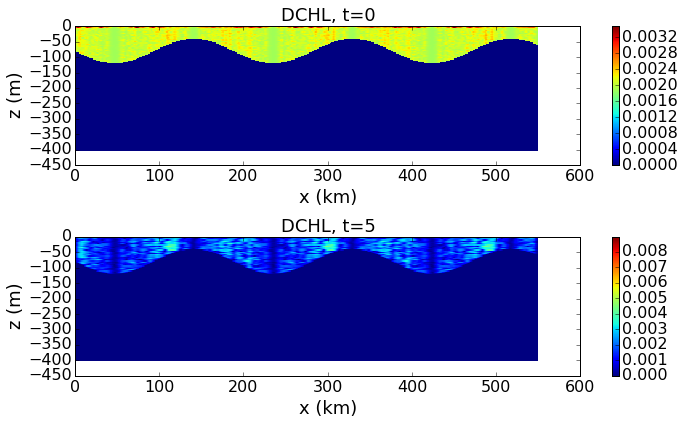

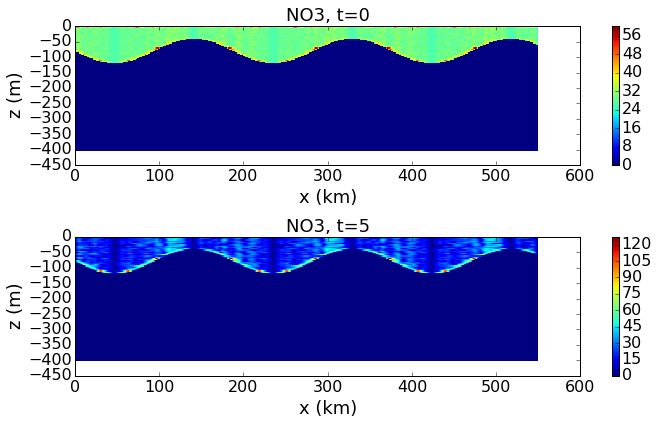

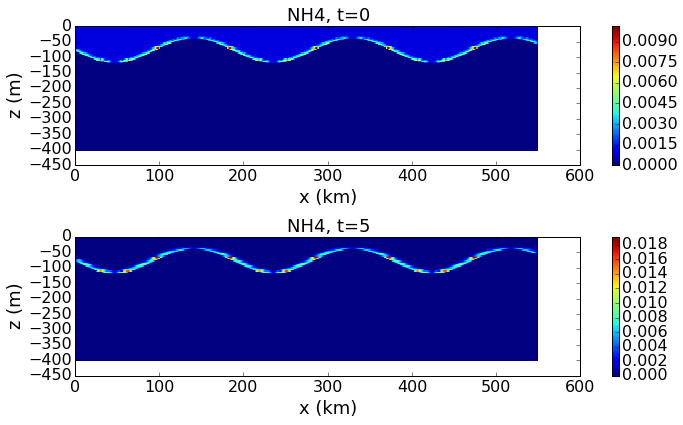

In [5]:
for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik)
        
        #mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:])
        mesh0=axs[0].pcolormesh(xx,zz,f.variables[ik][0,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('x (km)', fontsize=18)
        axs[0].set_title(ik + ', t=0', fontsize=18)
        #axs[0].autoscale(tight='True')
        #axs[0].axis([0, 550, -50, 0])
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)

        #mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][2,:,5,:])
        mesh1=axs[1].pcolormesh(xx,zz,f.variables[ik][2,:,5,:]*f3.variables['tmask'][0,:,5,:])
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('x (km)', fontsize=18)
        axs[1].set_title(ik + ', t=5', fontsize=18)
        #axs[1].autoscale(tight='True')
        #axs[1].axis([0, 550, -50, 0])
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()

In [6]:
np.min(f.variables['NH4'])

0.0

In [ ]:

for ik in fkeys:
    if np.size(f.variables[ik].shape) == 4:
        fig, axs = plt.subplots(2,1,figsize=(10,6))
        print (ik+str(np.min(f.variables[ik])))
        mesh0=axs[0].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,1095].conj().transpose())
        cb0=fig.colorbar(mesh0,ax=axs[0])
        axs[0].set_ylabel('z (m)', fontsize=18)
        axs[0].set_xlabel('time (days)', fontsize=18)
        axs[0].set_title(ik + ', River End', fontsize=18)
        axs[0].autoscale(tight='True')
        plt.setp(axs[0].get_xticklabels(),fontsize=16)
        plt.setp(axs[0].get_yticklabels(),fontsize=16)
        cb0.ax.tick_params(labelsize=16)
        plt.tight_layout()
        
        mesh1=axs[1].pcolormesh(tt/3600/24,tz,f.variables[ik][0:e,:,5,1095].conj().transpose()- \
                                f.variables[ik][0:e,:,5,5].conj().transpose())
        cb1=fig.colorbar(mesh1,ax=axs[1])
        axs[1].set_ylabel('z (m)', fontsize=18)
        axs[1].set_xlabel('time (days)', fontsize=18)
        axs[1].set_title(ik + ', Difference River - Closed Ends', fontsize=18)
        axs[1].autoscale(tight='True')
        plt.setp(axs[1].get_xticklabels(),fontsize=16)
        plt.setp(axs[1].get_yticklabels(),fontsize=16)
        cb1.ax.tick_params(labelsize=16)
        plt.tight_layout()
